In [83]:
import pandas as pd
import numpy as np
import gc
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from utils.age_utils import transform_age, anti_transform_age
from utils.metrics import evaluate_age_prediction
import matplotlib.pyplot as plt

In [65]:
geo_data_27k = [
    'GSE27317',
    'GSE41037',
    'GSE38873',
    'GSE15745',
    'GSE32393',
    'GSE25892',
    'GSE20242',
    'GSE22595',
    'GSE37988',
    'GSE17448',
    'GSE36642',
    'GSE26126',
    'GSE34035',
    'GSE28746',
    'GSE20236',
    'GSE19711',
    'GSE37008',
    'GSE36812',
    'GSE34257',
    'GSE38608',
    'GSE38291',
    'GSE36166',
    'GSE63384',
    'GSE59274',
    'GSE57285',
    'GSE56606',
    'GSE49908',
    'GSE49907',
    'GSE49905',
    'GSE49904'
]

geo_data_450k = [
    'GSE90124',
    'GSE115797',
    'GSE99624',
    'GSE108213',
    'GSE92767',
    'GSE69176',
    'GSE40360',
    'GSE59157',
    'GSE42861',
    'GSE77241',
    'GSE148000'
]

array_express_27k = [
    'E-GEOD-43256',
    'E-GEOD-64940',
    'E-MTAB-2344',
    'E-GEOD-62867',
    'E-GEOD-44763',
    'E-GEOD-48988',
    'E-GEOD-58119',
    'E-GEOD-58045',
    'E-GEOD-57484',
    'E-GEOD-54211',
    'E-GEOD-56342',
    'E-GEOD-27044',
    'E-GEOD-36194',
    'E-GEOD-21232',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-30758',
    'E-GEOD-32396',
    'E-GEOD-31979',
    'E-MTAB-625',
    'E-MTAB-487'
]

array_express_450k = [
    'E-MTAB-2372',
    'E-GEOD-73832',
    'E-GEOD-71678',
    'E-GEOD-71245',
    'E-GEOD-83334',
    'E-GEOD-75248',
    'E-GEOD-77955',
    'E-GEOD-67705',
    'E-GEOD-77445',
    'E-GEOD-79056',
    'E-GEOD-72556',
    'E-GEOD-52068',
    'E-GEOD-74738',
    'E-GEOD-76105',
    'E-GEOD-65638',
    'E-GEOD-71955',
    'E-GEOD-63106',
    'E-GEOD-73377',
    'E-GEOD-56515',
    'E-GEOD-73103',
    'E-GEOD-67024',
    'E-GEOD-72338',
    'E-GEOD-59457',
    'E-GEOD-64511',
    'E-GEOD-64495',
    'E-GEOD-59509',
    'E-GEOD-67444',
    'E-GEOD-62219',
    'E-GEOD-51954',
    'E-GEOD-52588',
    'E-GEOD-36054',
    'E-GEOD-50660',
    'E-GEOD-61259',
    'E-GEOD-61258',
    'E-GEOD-61257',
    'E-GEOD-61454',
    'E-GEOD-61380',
    'E-GEOD-61107',
    'E-GEOD-54690',
    'E-GEOD-49149',
    'E-GEOD-55438',
    'E-GEOD-53740',
    'E-GEOD-57767',
    'E-GEOD-49064',
    'E-GEOD-50759',
    'E-GEOD-56553',
    'E-GEOD-54399',
    'E-GEOD-53162',
    'E-GEOD-53128',
    'E-GEOD-50498',
    'E-GEOD-47513',
    'E-GEOD-49393',
    'E-GEOD-39004',
    'E-GEOD-51388',
    'E-GEOD-51032',
    'E-GEOD-48325',
    'E-GEOD-44712',
    'E-GEOD-45461',
    'E-GEOD-40279',
    'E-GEOD-41169',
    'E-GEOD-32149',
    'E-GEOD-41826',
    'E-GEOD-42700',
    'E-GEOD-32146',
    'E-GEOD-30870',
    'E-GEOD-34639',
    'E-GEOD-63347',
    'E-GEOD-59592'
]

tcga_all = [
    'TGCA_LUSC',
    'TGCA_THCA',
    'TGCA_HNSC',
    'TGCA_KIRC',
    'TGCA_KIRP',
    'TGCA_LUAD',
    'TGCA_PRAD',
    'TGCA_STAD',
    'TGCA_COAD',
    'TGCA_LIHC',
    'TGCA_UCEC',
    'TGCA_BRCA'
]

cancer_data = [
    'GSE32393',
    'GSE37988',
    'GSE26126',
    'GSE63384',
    'GSE59157',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-31979',
    'E-GEOD-77955',
    'E-GEOD-52068',
    'E-GEOD-49149',
    'E-GEOD-39004'
]

cancer_comparison = [
    'GSE53051',
]

reliability = [
    'GSE55763',
]

rejuvenation = [
    'GSE142439',
    'GSE116754',
    'GSE65214',
    'GSE44430',
    'GSE45727',
    'GSE30653',
    'GSE37066',
    'GSE30456',
]

senescence_analysis = [
    'GSE91069',
    'GSE100249'
]

data_27k = np.concatenate([np.array(geo_data_27k), np.array(array_express_27k)])
data_450k = np.concatenate([np.array(geo_data_450k), np.array(array_express_450k)])
geo_data = np.concatenate([data_27k, data_450k])
tcga_all = np.array(tcga_all)
all_data = np.concatenate([data_27k, data_450k, tcga_all])

#load all train data for model training
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_train = pd.read_pickle('../data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('../data_train/' + dataset + '.pkl')
        all_train = pd.concat([all_train, new_df], join ='inner')
        gc.collect()
    clear_output()

#load all test data
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_test = pd.read_pickle('../data_test/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('../data_test/' + dataset + '.pkl')
        all_test = pd.concat([all_test, new_df], join ='inner')
        gc.collect()
    clear_output()

In [66]:
multi_platform_cpgs = np.array(pd.read_pickle('../dependencies/multi_platform_cpgs.pkl'))

#extracting age and removing unimportant columns
train_ages = all_train['age'].astype('float64')
test_ages = all_test['age'].astype('float64')

train_info = all_train[['dataset', 'tissue_type', 'age', 'gender']]
test_info = all_test[['dataset', 'tissue_type', 'age', 'gender']]

train = all_train[multi_platform_cpgs]
test = all_test[multi_platform_cpgs]

train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

#scaling the data so each columns has 0 mean and variance 1
scaler = preprocessing.RobustScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), index = train_index, columns = train_cols)
test_scaled = pd.DataFrame(scaler.transform(test), index = test_index, columns = test_cols)

In [67]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(train, transform_age(train_ages))

LinearRegression()

In [68]:
predicted_ages = anti_transform_age(linear_regression_model.predict(test))
print(type(test))

# Performance
results_linear = evaluate_age_prediction(test_ages, predicted_ages, cpg_count=len(train_cols), model_name="Linear Regression")
print(results_linear.round(3))

<class 'pandas.core.frame.DataFrame'>
               Model   CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  Linear Regression  20318  3.455  5.16  61.511      0.959         0.019


In [27]:
ridge = Ridge(alpha=10.0)
ridge.fit(train, transform_age(train_ages))

Ridge(alpha=10.0)

In [28]:
ridge_predictions = anti_transform_age(ridge.predict(test))

results_ridge = evaluate_age_prediction(test_ages, ridge_predictions, model_name="Ridge Regression", cpg_count=len(train_cols))
print(results_ridge.round(3))

              Model   CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Ridge Regression  20318  2.412  3.687  33.234      0.977         0.009


In [31]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [32]:
lasso_predictions = anti_transform_age(lasso.predict(test_scaled))

results_lasso = evaluate_age_prediction(test_ages, lasso_predictions, model_name="Lasso", cpg_count=np.sum(lasso.coef_ != 0))
print(results_lasso.round(3))

   Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Lasso  3967  2.753  4.169  42.767      0.971         0.027


In [34]:
elasticNet = ElasticNet(alpha=0.01, l1_ratio=0.1)
elasticNet.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.1)

In [35]:
elasticNet_predictions = anti_transform_age(elasticNet.predict(test_scaled))

results_elasticNet = evaluate_age_prediction(test_ages, elasticNet_predictions, model_name="ElasticNet scaled", cpg_count=np.sum(elasticNet.coef_ != 0))
print(results_elasticNet.round(3))

               Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  ElasticNet scaled  4321  2.723  4.092  41.168      0.972         0.018


In [58]:
import importlib
from utils import visualization
importlib.reload(visualization)
from utils.visualization import plot_feature_importance

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


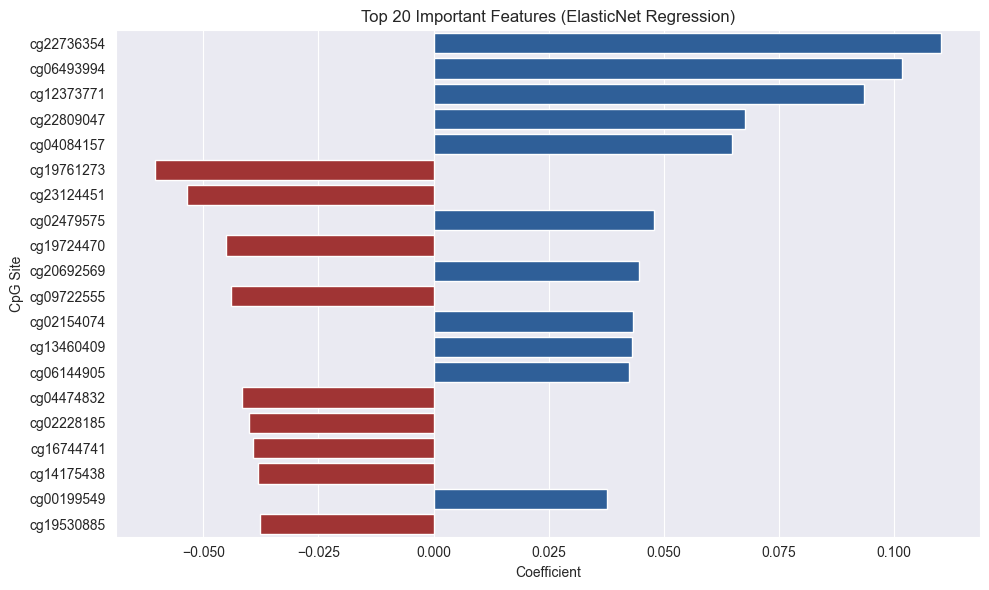

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


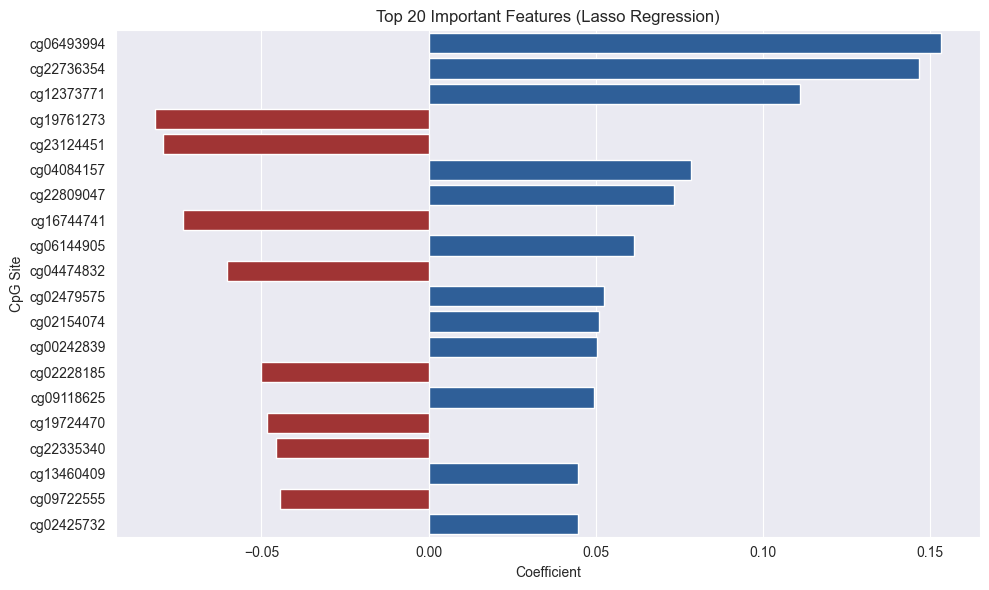

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


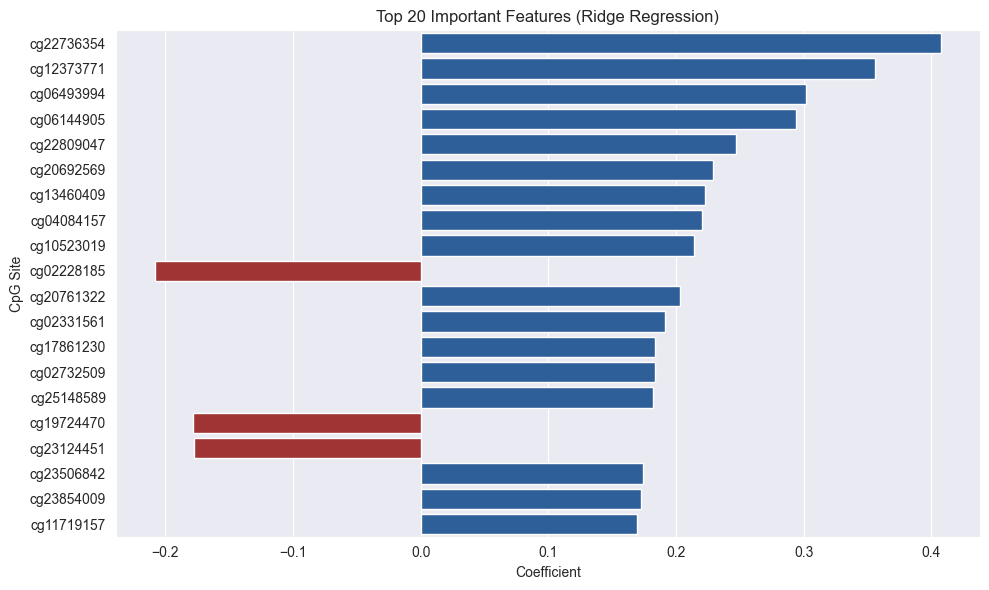

C:\Users\elena\PycharmProjects\rp-delft\utils\visualization.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  # Sort by absolute importance and keep top_n


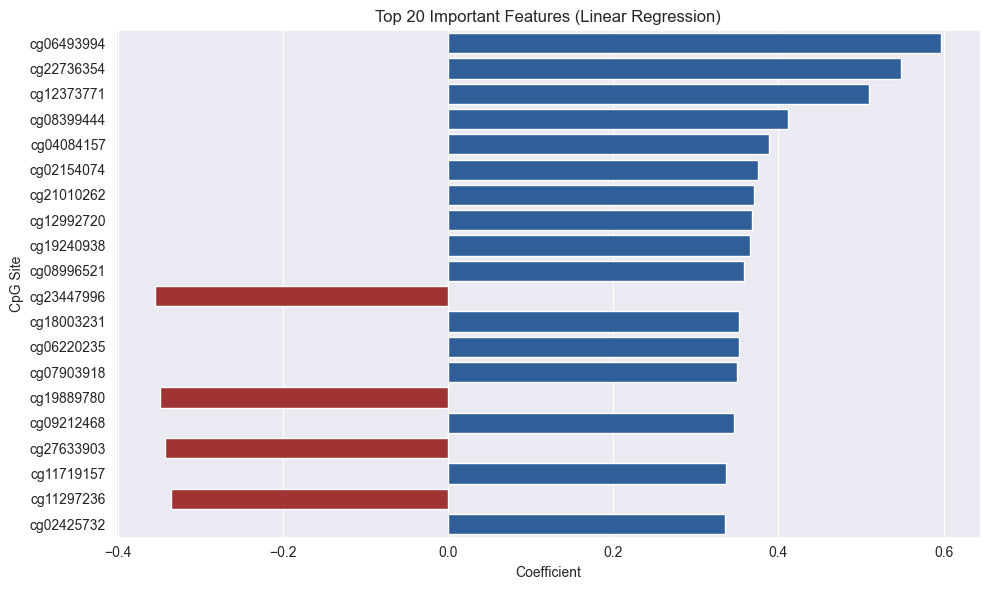

,Feature,Importance,AbsImportance
4703,cg06493994,0.596479,0.596479
16693,cg22736354,0.548135,0.548135
8978,cg12373771,0.509647,0.509647
6057,cg08399444,0.411702,0.411702
3004,cg04084157,0.388903,0.388903
1557,cg02154074,0.375624,0.375624
15394,cg21010262,0.370985,0.370985
9441,cg12992720,0.368566,0.368566
14120,cg19240938,0.365945,0.365945
6488,cg08996521,0.357783,0.357783


In [59]:
plot_feature_importance(elasticNet, feature_names=train_cols,  top_n=20, title='Top 20 Important Features (ElasticNet Regression)')
plot_feature_importance(lasso, feature_names=train.columns, top_n=20, title='Top 20 Important Features (Lasso Regression)')
plot_feature_importance(ridge, feature_names=train.columns, top_n=20, title='Top 20 Important Features (Ridge Regression)')
plot_feature_importance(linear_regression_model, feature_names=train.columns, top_n=20, title='Top 20 Important Features (Linear Regression)')

In [61]:
top_elasticnet = plot_feature_importance(elasticNet, feature_names=train.columns, top_n=100, plot=False)
top_lasso = plot_feature_importance(lasso, feature_names=train.columns, top_n=100, plot=False)
top_ridge = plot_feature_importance(ridge, feature_names=train.columns, top_n=100, plot=False)
top_linear = plot_feature_importance(linear_regression_model, feature_names=train.columns, top_n=100, plot=False)

elasticnet_features = set(top_elasticnet['Feature'])
lasso_features = set(top_lasso['Feature'])
ridge_features = set(top_ridge['Feature'])
linear_features = set(top_linear['Feature'])

overlapping_all = elasticnet_features & lasso_features & ridge_features & linear_features

print("Overlapping CpG sites across all models:")
print(overlapping_all)


Overlapping CpG sites across all models:
{'cg19889780', 'cg22736354', 'cg11279021', 'cg02479575', 'cg06580318', 'cg17861230', 'cg02228185', 'cg04084157', 'cg11719157', 'cg06493994', 'cg02154074', 'cg12992720', 'cg25256723', 'cg12373771', 'cg17655614', 'cg14175438', 'cg19761273'}


# SHAP analysis

In [82]:
import shap

explainer_linear = shap.Explainer(linear_regression_model, train, feature_names=train_cols)
explainer_lasso = shap.Explainer(lasso, train, feature_names=train_cols)
explainer_ridge = shap.Explainer(ridge, train, feature_names=train_cols)
explainer_elasticNet = shap.Explainer(elasticNet, train, feature_names=train_cols)

shap_values_linear = explainer_linear(test)
shap_values_lasso = explainer_lasso(test)
shap_values_ridge = explainer_ridge(test)
shap_values_elasticNet = explainer_elasticNet(test)

LinearExplainer explainer: 5456it [00:26, 140.93it/s]                           


In [90]:
def get_top_shap_features(shap_values, feature_names, top_n=20):
    """Return top N features with highest mean absolute SHAP values."""
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[-top_n:][::-1]
    return set(np.array(feature_names)[top_indices])

# Get top SHAP features for each model
top_linear = get_top_shap_features(shap_values_linear, train.columns, top_n=1000)
top_lasso = get_top_shap_features(shap_values_lasso, train.columns, top_n=1000)
top_ridge = get_top_shap_features(shap_values_ridge, train.columns, top_n=1000)
top_elastic = get_top_shap_features(shap_values_elasticNet, train.columns, top_n=1000)

# Intersection
intersection = top_linear & top_lasso & top_ridge & top_elastic

print("Overlapping top SHAP features in all models:", intersection)


Overlapping top SHAP features in all models: {'cg23320649', 'cg23124451', 'cg13547237', 'cg19761273', 'cg23696886', 'cg27132814', 'cg16537367', 'cg00242839', 'cg23566503', 'cg01593385', 'cg07651914', 'cg04456238', 'cg01402255', 'cg07239938', 'cg21232015', 'cg18573251', 'cg10753073', 'cg18888403', 'cg09212468', 'cg02317907', 'cg22947000', 'cg17500962', 'cg09118625', 'cg19497444', 'cg12373771', 'cg11105610', 'cg23208881', 'cg06493994', 'cg12992720', 'cg22335340', 'cg10923408', 'cg20775254', 'cg16834187', 'cg10287137', 'cg01843018', 'cg11953824', 'cg17349199', 'cg27210390', 'cg25256723', 'cg22809047', 'cg04999691', 'cg21745164', 'cg06378617', 'cg05149586', 'cg05473677', 'cg08359956', 'cg19889780', 'cg22736354', 'cg04084157', 'cg02732509', 'cg17655614', 'cg14894144', 'cg08418111', 'cg23207527', 'cg17063929', 'cg09809672', 'cg08072716', 'cg08965235', 'cg19530885', 'cg22197830', 'cg14244577', 'cg00311768', 'cg01262913', 'cg19724470', 'cg27169020', 'cg16744741', 'cg14871138', 'cg11719157', 'c

In [80]:
# print(shap_values.values.min(), shap_values.values.max())
# import matplotlib.pyplot as plt
# # Create beeswarm plot
# shap.plots.beeswarm(shap_values, show=False)  # `show=False` prevents it from auto-rendering
#
# # Zoom in: set x-axis limits
# plt.xlim(-1, 1)  # Change this to zoom as needed
# plt.show()


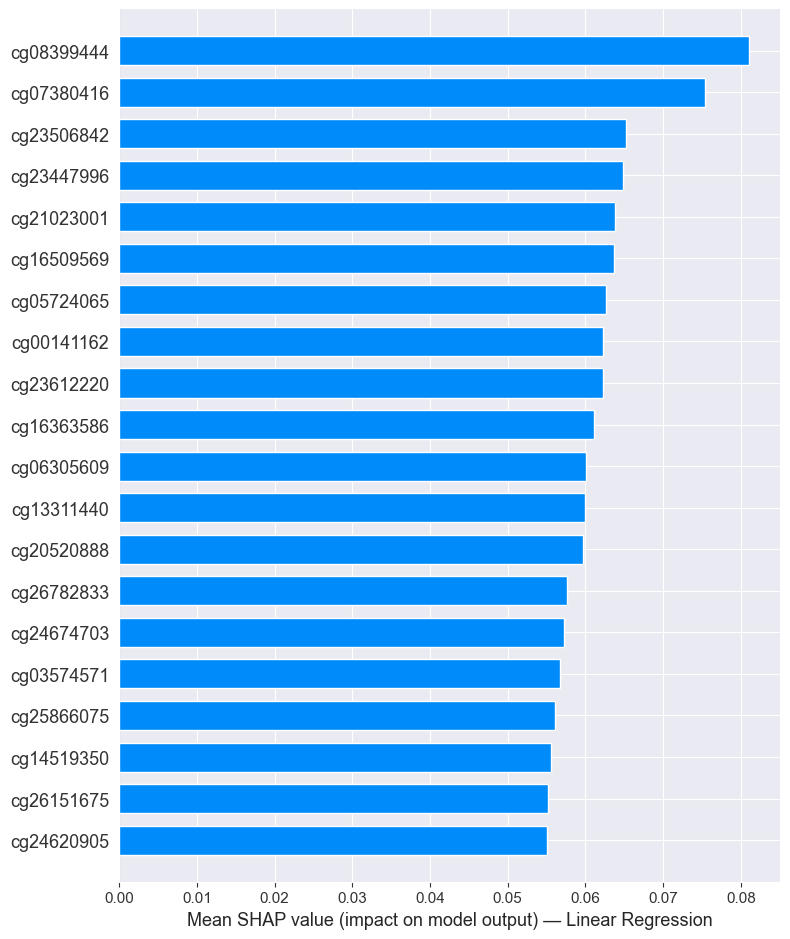

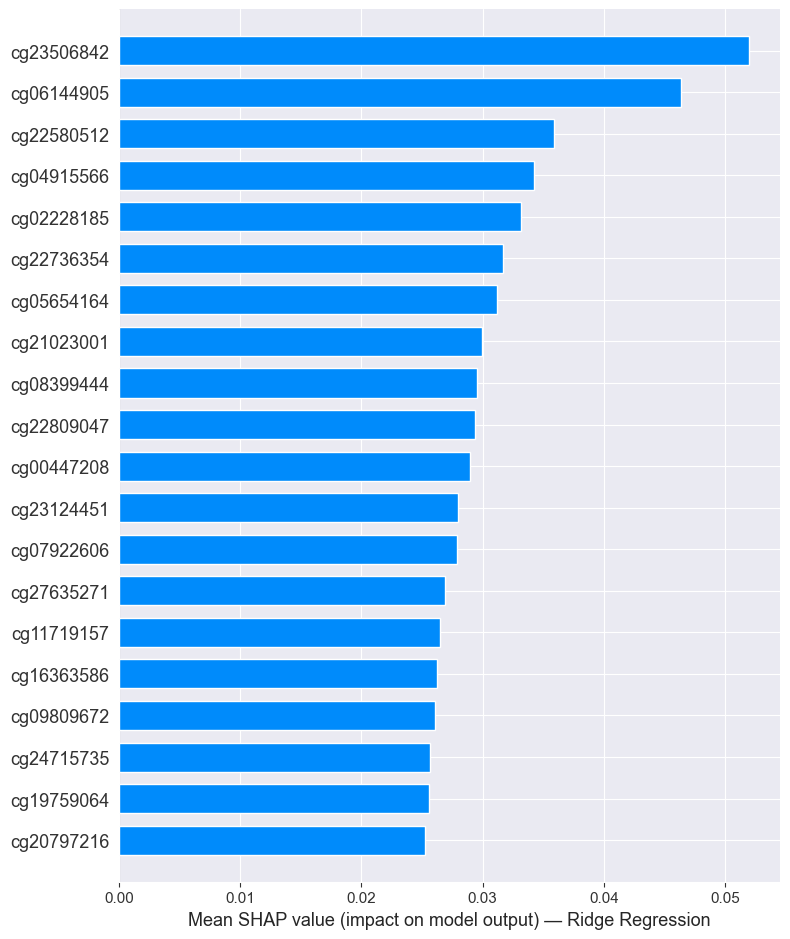

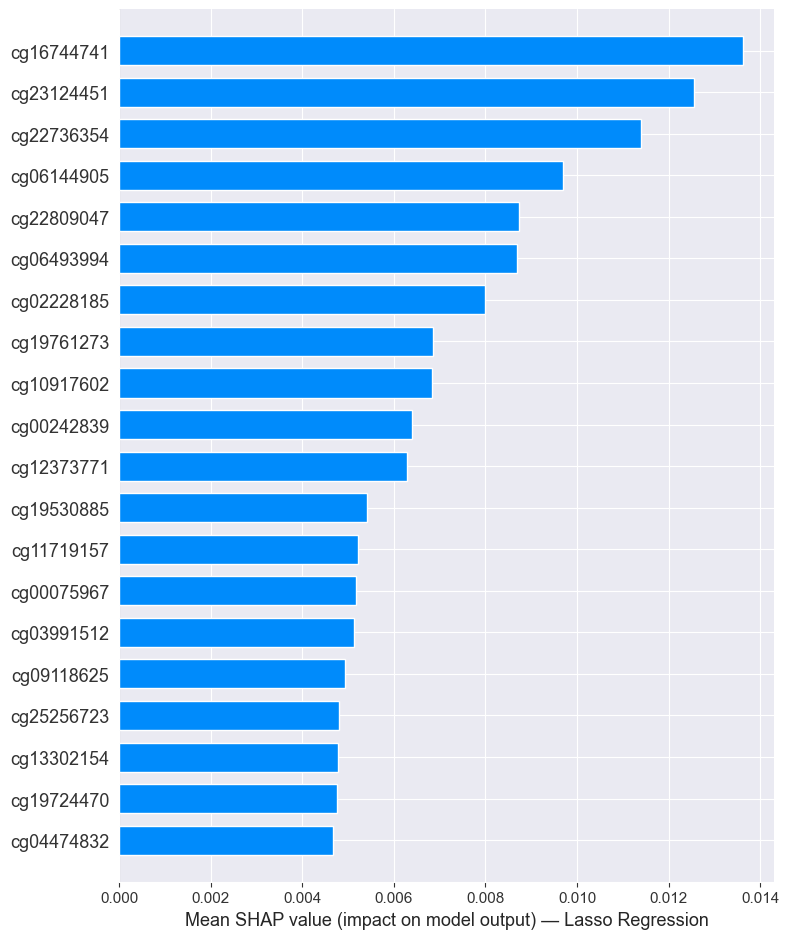

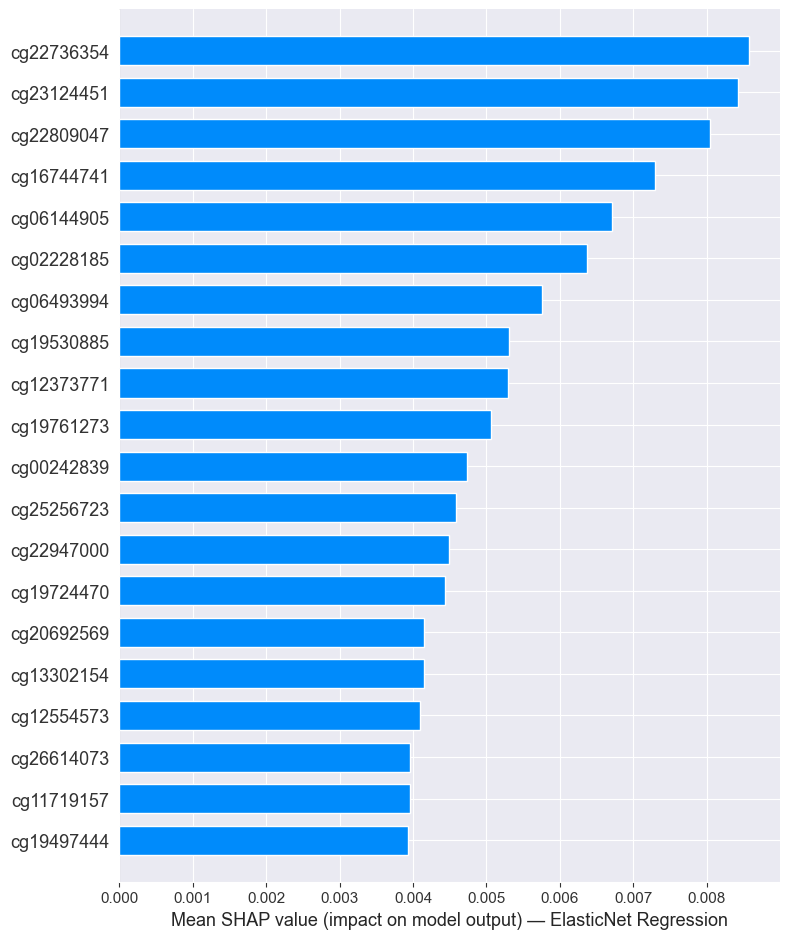

In [86]:
# shap.plots.beeswarm(shap_values)
#
# shap.plots.bar(shap_values)

shap.summary_plot(shap_values_linear, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — Linear Regression")
plt.show()

shap.summary_plot(shap_values_ridge, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — Ridge Regression")
plt.show()

shap.summary_plot(shap_values_lasso, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — Lasso Regression")
plt.show()

shap.summary_plot(shap_values_elasticNet, test, plot_type="bar", show=False)
plt.xlabel("Mean SHAP value (impact on model output) — ElasticNet Regression")
plt.show()
